# NLE Coursework 1 - 164870

---

---

Word count: 2915 (counting test in markdown cells )

## Section 1
---

In [1]:
import sys
sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from collections import defaultdict,Counter
from itertools import zip_longest
from IPython.display import display
from random import seed
get_ipython().magic('matplotlib inline')
import random
import math
import matplotlib.pylab as pylab
%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
from pylab import rcParams
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import csv

## Section 1.1

The code below is taking reviews about books from an Amazon corpus reader. I have provided a word list size of 300 as a means to test its accuracy against a Naive Bayes Classifier.

A wordlist classifier will take a word, for example: 'bad', and assign a sentiment value: negative. A Naive Bayes classifier will look at a word, and assigns a probability on the sentiment: the word 'bad' is used negatively 80% of the time.

As you can see from the results below, Accuracy of a Naive Bayes classifier will be greater than that of a wordlist. If you run the code multiple times, you will see that the accuracies vary per run. This is due to training the classifiers on a particular data, and then testing them on another. Given that a wordlist classifier will directly assign a sentiment to a word, and a Naive Bayes assigns the likelihood of a words sentiment, these will depend on the samples used in the training data. I also found that Wordlist classifiers will guess the classification of a word if it is unknown, where as a Naive Bayes has properties like 'unknown value' to help this issue. 

I have annotated the code to describe how it works.

Sussex NLTK root directory is \\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources
The accuracy of Word List classifer is 0.62
The accuracy of the Naive Bayes classifier is 0.78.


(0.5, 1.0)

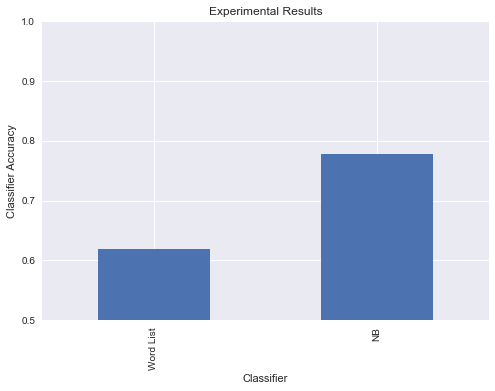

In [2]:
from classification_utils import *

arcr = AmazonReviewCorpusReader().category("book")    #Store an amazon corpus reader relevant to book.

word_list_size = 300    #Set word limit.
pos_train,neg_train,pos_test,neg_test = get_train_test_data(arcr)    #Call method 'get_train_test_data' with arcr as param. This initialises train and test data.
WL_accuracy = run_WL(pos_train,neg_train,pos_test,neg_test,word_list_size)    #Store accuracy of Wordlist classifer by running method 'run_WL'.
NB_accuracy = run_NB(pos_train,neg_train,pos_test,neg_test)    #Store accuracy of Naive Baye classifer by running method 'run_NB'.

print("The accuracy of Word List classifer is {0:.2f}".format(WL_accuracy))    #Print accuracies.
print("The accuracy of the Naive Bayes classifier is {0:.2f}.".format(NB_accuracy))

df = pd.DataFrame([("Word List",WL_accuracy),("NB",NB_accuracy)])    #Print graphical representation.
ax = df.plot.bar(title="Experimental Results",legend=False,x=0)
ax.set_ylabel("Classifier Accuracy")
ax.set_xlabel("Classifier")
ax.set_ylim(0.5,1.0)

## Section 1.2

I have included code to find the average across multiple sample sizes of positive and negative reviews, finding the average accuracy of the classifiers. The graph shows exponential increases in both, but more significantly in the Naive Bayes classifiers. This is due to providing a better training data set for the Naive Bayes classifier to use.

By increasing the amount of reviews, the result is exponential, tending to an accuracy of 0.8 (1 d.p) for the Naive Bayes classifier. Significant increase overloads the program. Max 'sample_size' can be is 700, otherwise error: 'Sample larger than population or is negative' appears. This is because data capacity has been reached at 700 samples.




(0.4, 1.0)

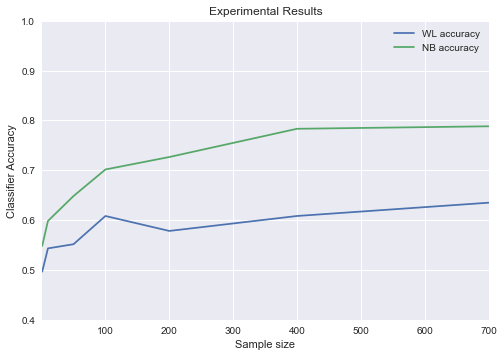

In [3]:
from classification_utils import *

arcr = AmazonReviewCorpusReader().category("book")    #Store an amazon corpus reader relevant to book.
word_list_size = 100    #Set word limit.
repetitions = 1    #Set repetitions.
sample_sizes = [1,10,50,100,200,400,700]    #List of samples sizes to test.
WL_accuracies=[]    #List for Wordlist and Naive Baye accuracies for various sample sizes.
NB_accuracies=[]

for size in sample_sizes:    #compute accuracies for all sample sizes. Inner loop implements code from section 1.1
    WL_accuracy_tot = 0
    NB_accuracy_tot = 0
    for i in range(repetitions): 
        pos_train,neg_train,pos_test,neg_test = get_train_test_data(arcr)
        pos_train_sample = sample(pos_train, size) 
        neg_train_sample = sample(neg_train, size) 
        WL_accuracy_tot += run_WL(pos_train_sample,neg_train_sample,pos_test,neg_test,word_list_size)
        NB_accuracy_tot += run_NB(pos_train_sample,neg_train_sample,pos_test,neg_test)
    WL_accuracies.append(WL_accuracy_tot/repetitions)
    NB_accuracies.append(NB_accuracy_tot/repetitions)

pd.set_option('precision',2)    #Print graphical representation.
df = pd.DataFrame(list(zip(sample_sizes, WL_accuracies, NB_accuracies)),
                  columns=["Sample size","WL accuracy","NB accuracy"])    
ax = df.plot(title="Experimental Results",x=0)
ax.set_ylabel("Classifier Accuracy")
ax.set_ylim(0.4,1.0)


## Section 1.3

Below I have collected individual test/train data from 4 categories: dvd, book, kitchen and electronics. I then compare each source, and output the result as a graph.

You can see from the graph that the best results achieved when the source and target data come from the same category. This is because the context of the classifier will be similar if trained in the same environment that it is tested. 

When testing across categories, you find the best results when comparing 'electronics' and 'kitchen'. This would make sense as  
'kitchen' can be interpreted as a child of electronics: most items constituting a kitchen are electronic now a day. 

If we look at the categories that returned the worst results, you will see this is within 'book' and 'electronics'. This is because it is very hard to analyse sentiment between fictional (E.g - a novel) and non-fictional (E.g - a personal review on a washing machine). For example, the word 'broken' can refer to 'broken English', which describes the dialogue of Marlon James' bestseller: 'A brief history of seven killings'. 'Broken' does not bare a negative connotation in this context. However, the use of 'broken' in an electronic review bares a very heavy negative connotation. This is a potential explanation of why training a classifier via 'book' and testing it on 'electronics' showed the worst accuracy.   


(0.5, 1.0)

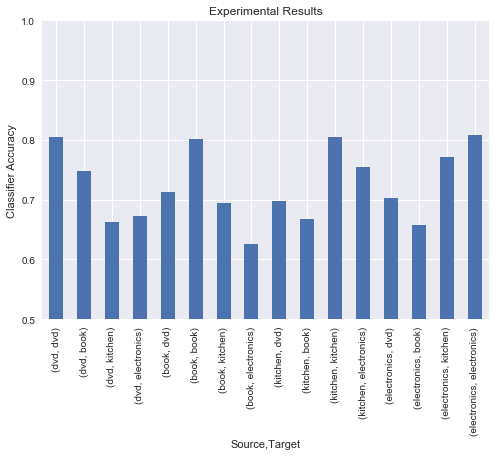

In [4]:
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
from classification_utils import *

dvd_test, dvd_train   = get_formatted_train_test_data("dvd")    #Get test and train data for each category.
book_test, book_train = get_formatted_train_test_data("book")
kitchen_test, kitchen_train  = get_formatted_train_test_data("kitchen")
electronics_test, electronics_train = get_formatted_train_test_data("electronics") 

sources = {"dvd" : dvd_train,    #Create a set for train data's for each category. 
           "book" : book_train,
           "kitchen" : kitchen_train,
           "electronics" : electronics_train
         }

targets = {"dvd" : dvd_test,    #Create a set for test data's for each category. 
           "book" : book_test,
           "kitchen" : kitchen_test,
           "electronics" : electronics_test
         }

results = []

for source in sources.keys():    #add results for cross-domain analysis.
    for target in targets.keys():
        results.append((source,target,run_NB_preformatted(sources[source],targets[target])))

pd.set_option('precision',2)    #Print graphical representation.
df = pd.DataFrame(results,columns=["Source","Target","Accuracy"])   
ax = df.set_index(['Source', 'Target']).plot.bar(legend=False,title="Experimental Results")
ax.set_ylabel("Classifier Accuracy")
ax.set_ylim(0.5,1.0)


Below are results from training a classifier in multiple categories, and testing them on one particular domain. It was interesting to find that, despite training a classifier on 'dvd' and 'book', then testing this on either 'electronics' or 'kitchen', you still got similar (sometimes worse) results then just cross-testing a classifier from one domain. The last four results in the table show accuracy improves when training multiple categories, including itself. These Provided accuracies within a range of 0.01 (excluding 24). 

![title](MultiCatTable.png)

In conclusion, there is a significant dependency on where the data is trained and where it is tested. Context plays a big roll, and training a classifier on multiple, irrelevant domains will be less effective than just training it on the one relevant category.

## Section 1.4

Here is my implementation of the feature extractor used to optimise the Naive Bayes classifier. It works by parsing words from a review into various methods, which produces lists of manipulated text. These provided more accurate and selective training data for the classifiers.

If you look at the results table, you can see the range between accuracies is greatly reduced, and the overall classification of all categories is much higher than previous, with all categories averaging around 0.8.

Categories with the greatest accuracy where the 'kitchen' and 'electronics' categories. They performed best on 'lower' and 'stem' FE. This is because these categories are more subjective then fictional reviews.

'dvd' outperformed all categories stem FE. This could be due to the nature in which people write 'dvd' reviews: larger use of affixes.  'book' preformed the worst overall. This could be down to the interpretation. 'Electronics' have a set purpose to preform operations, so peoples reviews tightly cohere around the purpose. A 'book' has no real purpose, and can have loose interpretations. This makes it hard to train a classifier on data which is loosely attached.

Extracting on punctuation and stopwords had the smallest range across all categories. I would assume this is because people pay more attention to formality when writing a public review, as opposed to just describing something to a friend.


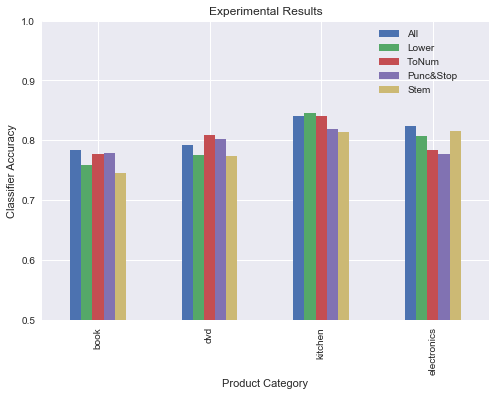

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

stopwords = stopwords.words('english')    #Initialise english stopwords and stemmer.
stemmer = PorterStemmer()

#Method for extracting all features.
def FE_all(review):
    return review.words()

#Method for extracting lower case features.
def FE_lower(review):
    return [word.lower() for word in review.words()]

#Method for extracting features by replacing a digit with: NUM.
def FE_toNum(review):
    return ['NUM' if word.isdigit() else word for word in review.words()]

#Method for extracting features if word is not a stopword.
def FE_puncStop(review):
    return [word for word in review.words() if word.isalpha() and word not in stopwords]

#Method for extracting features using the nltk stemmer.
def FE_stem(review):
    return [stemmer.stem(word) for word in review.words()]

#Method for testing feature extractors.
#Passes various extractors through as parameters.
#For all categories, pass them through the the relevant feature extractor. 
#Use the same principle as used in section 1.3 to compute accuracies.
#Param:  featureExtractor - the feature extractor you want to test.
#Return: baseline         - A set containing accuracies of each category.
def get_FE_results(featureExtractor):
    baseline = {}
    for prod_cat in prod_categories:
        repetitions = 1 
        NB_accuracy_tot = 0
        for i in range(repetitions): 
            test, train   = get_formatted_train_test_data(prod_cat,featureExtractor)
            NB_accuracy_tot += run_NB_preformatted(train,test)
        baseline[prod_cat] = NB_accuracy_tot/repetitions
    return baseline

prod_categories = ["book","dvd","kitchen","electronics"]    #Call 'get_FE_results' with each feature extractor.
FE_results_all = get_FE_results(FE_all)
FE_results_lower = get_FE_results(FE_lower)
FE_results_toNum = get_FE_results(FE_toNum)
FE_results_puncStop = get_FE_results(FE_puncStop)
FE_results_stem = get_FE_results(FE_stem)

#Print graphical representation.
colHead = ["Category","All","Lower", "ToNum", "Punc&Stop", "Stem"]
pd.set_option('precision',2)
df = pd.DataFrame(list(zip(prod_categories,
                           [FE_results_all[prod_cat] for prod_cat in prod_categories],
                           [FE_results_lower[prod_cat] for prod_cat in prod_categories],
                           [FE_results_toNum[prod_cat] for prod_cat in prod_categories],
                           [FE_results_puncStop[prod_cat] for prod_cat in prod_categories],
                           [FE_results_stem[prod_cat] for prod_cat in prod_categories])),
                  columns=colHead)
#display(df)
ax = df.plot.bar(x=0,title="Experimental Results")
ax.set_ylabel("Classifier Accuracy")
ax.set_xlabel("Product Category")
ax.set_ylim(0.5,1.0)
ax.legend(bbox_to_anchor=(0.95, 1))

---
## Section 2
---

In [6]:
import spacy
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader

nlp = spacy.load('en')
dvd_reviews = [review for review in AmazonReviewCorpusReader().category("dvd").raw()]
print("The dvd review dataset contains {} reviews".format(len(dvd_reviews)))

The dvd review dataset contains 5491 reviews


## Section 2.1

This is detailed description of the code below representing my implementation for the opinion extractor. It follows the Structure provided in topic 6 through steps A to E, and includes successful implementation for A, B, C and G of the optional sentences. This can be inspected by uncommenting the bottom part of the code, which has been labelled for the extension.

My opinion extractor is separated into 3 parts: 
The first part is finding a word relevant to the context (whether the sentence roots to any word in 'aspect_words'. If so, we want to iterate through the children of the root and interrogate their dependencies. From extension A, I have implemented tests for whether the dependency is amod (adjective modifier) or advmod (adverbial modifier). If these conditions are met, the strings are concatenated and stored in the opinions set. There is also a test for negation (provided from extension E, which appends 'not-' to the beginning of the string.

The second part, initially implementing extension B, deals with sentences where the root is not a noun. This is due to the root word typically originating from a verb. If a verb is detected in the review sentence, the children of that word are iterated through. If the part of speech is an adjective, call method 'interrogate'.

The 3rd part deals with adverbial modifiers (extension C) and continuous conjunctions (extension D) using method 'interrogate'. If a 'advmod' dependency is found, concatenate to string. If a sentence has n amount of conjunctives, the first 'conj' dependency is detected, and passed to method 'iterrogate'. This will perform the same operations as described above, but if dependency 'conj' were detected within a child, the method would call itself with the relevant child parameter.

This produces a set 'opinions' with all relevant words. 'opinions' gets appended to tuple 'results', containing the aspect word, the sentence string and the opinion based on the sentence.

Method 'show_results' displays relevant information regarding the reviewed sentence.

In order to be able to pass sentences through the opinion extractor, data needs passing through the nlp toolkit.

The program will perform this operation for the four aspects provided.

Thorough comments within code have been provided.

In [7]:
#Core sentences for testing.
core = [("A.1","It has an exciting fresh plot.",set(["fresh", "exciting"])),
        ("B.1","The plot was dull.",set(["dull"])),
        ("C.1","It has an excessively dull plot.",set(["excessively-dull"])),
        ("C.2","The plot was excessively dull.",set(["excessively-dull"])),
        ("D.1","The plot wasn't dull.",set(["not-dull"])),
        ("D.2","It wasn't an exciting fresh plot.",set(["not-exciting", "not-fresh"])),
        ("D.3","The plot wasn't excessively dull.",set(["not-excessively-dull"])),
        ("E.1","The plot was cheesy, but fun and inspiring.",set(["cheesy", "fun", "inspiring"])),
        ("E.2","The plot was really cheesy and not particularly special.",set(["really-cheesy", "not-particularly-special"]))
       ]
#Optional sentences for testing.
optional = [("A","The script and plot are utterly excellent.",set(["utterly-excellent"])),
            ("B","The script and plot were unoriginal and boring.",set(["unoriginal", "boring"])),
            ("C","The plot wasn't lacking.",set(["not-lacking"])),
            ("D","The plot is full of holes.",set(["full-of-holes"])),
            ("E","There was no logical plot to this story.",set(["no-logical"])),
            ("F","I loved the plot.",set(["loved"])),
            ("G","I didn't mind the plot.",set(["not-mind"]))
           ]

#Method for the opinion extractor:
#Pass an aspect word (E.g - 'plot', 'character') and a sentence. 
#Iterate through each word in sentence, analysing the dpendancies and part of speech.
#If words are found referencing the opinion of the review, add them to a set.
#Param: aspect_token    - list constaining words of interest.
#       parsed_sentence - sentence from the review which has been processed by the nlp toolkit.
#Return: Opinions       - set containing strings describing the opinion.
def opinion_extractor(aspect_token,parsed_sentence):  
    opinions = []    #set to contain the opinions.
    
    for token in parsed_sentence:    #loop to iterate through all tokens in sentence.
        neg = ""
        if token.pos_ == 'NOUN' and token.orth_ == aspect_token:     #If token is a noun and  in aspect words, interrogate its children.
            for child in token.children:  
                if child.dep_ == 'neg':     #If "n't" is present, add "not-" to beginning.
                    neg = "not-"
                if child.dep_== 'amod':     #If 'amod' dependency is present, add to string.
                    adj_token = child.orth_
                    for adv_child in child.children:    #Interrogate children of the token.
                        if adv_child.dep_ == 'advmod':  #If child for 'advmod' dependancies in children of 'amod' token. Add to same string.
                            adj_token = adv_child.orth_ + "-" + adj_token
                    opinions.append(neg + adj_token)    #append opinion to opinions.
                
        if token.pos_ == 'VERB':    #if token is a verb, interrogate its children. 
            for child in token.children:
                if child.pos_ == 'ADJ':    #If an adjective is present, add to string, and interrogate its children via method: interrogate.
                    adj_token = child.orth_
                    interrogate(child, opinions)     
                    
            #THIS IS FOR THE ADDITIONAL SENTENCES
            for child in token.children:
                if child.dep_ == 'neg':
                    opinions.append('not-' + token.orth_)  
            #
    return opinions

#Recursive method for testing verbs and conjuctives:
#Adds string which is either an adverbal modifier or conjuctive of a verb to the 'opinions' set.
#If conjuctive is present, call method with conjuctive child.
#Param: token    - word with the advmod/conj dependancy.
#       opinions - set containing the opinions.
def interrogate(token, opinions):
    neg = ""
    verb_token = token.orth_
    for child in token.children:
        if child.dep_ == 'neg':    #If "n't" is present, add "not-" to beginning.
            neg = "not-"
        if child.dep_ == 'advmod':    #If child of verb has 'advmod' dependancies.
            verb_token = child.orth_ + "-" + verb_token
        if child.dep_ == 'conj':    #If conjuctive dependency is present, call itself with current child.
            interrogate(child, opinions)
    opinions.append(neg + verb_token)    #append opinion to opinions.
    return 

#Method for output display:
#Iterate through results (which is a 3 tuple including the aspect token, the sentence, and the opinions) 
#and print them out.
def show_results(results,aspect_word):
    print("Results for aspect word '{}'\n".format(aspect_word))
    for word,sent,opinions in results:
        if word == aspect_word:
            print("Sentence:\n\t{}".format(sent))
            print("Opinion of '{0}':\n\t '{1}'".format(aspect_word,"', '".join(opinions)))
            print("\n")

aspect_words = ["plot","characters","cinematography","dialogue"]    #Aspect words to focus opinion on.
   
results = []    #set to contain results.
 
for review in core:    #Main feature to pass sentences through nlp toolkit and the opinion extractor.
    parsed_review = nlp(review[1])    #Store the review after processing it via nlp toolkit.
    for sentence in parsed_review.sents:    #Go through every sentence in the review.
        for aspect_token in aspect_words:    #Pass sentence through opinion extractor with aspect token.
            opinions = opinion_extractor(aspect_token,sentence)    #Add to sets. 
            if opinions:
                results.append((aspect_token,sentence.orth_,opinions))
        
#Run test for various aspects, Only plot has been used, so other aspects have been commented out.
show_results(results, "plot")
#show_results(results,"characters")
#show_results(results,"cinematography")
#show_results(results,"dialogue")

#UNCOMMENT FOLLOWING LINES FOR OPTIONAL SENTENCES:
#print("__________________________________")
#print("_______Additional_Sentences_______")
#print("__________________________________")
#
##Use to analysis additional sentences.
#for opt_review in optional:
#    #Store the review after processing it via nlp toolkit.
#    parsed_review = nlp(opt_review[1])
#    #Go through every sentence in the review.
#    for sentence in parsed_review.sents:
#        #Pass sentence through opinion extractor with aspect token.
#        for aspect_token in aspect_words:
#            #Add to sets. 
#            opinions = opinion_extractor(aspect_token,sentence)
#            if opinions:
#                results.append((aspect_token,sentence.orth_,opinions))
#                
#show_results(results, "plot")
#show_results(results,"characters")
#show_results(results,"cinematography")
#show_results(results,"dialogue")

Results for aspect word 'plot'

Sentence:
	It has an exciting fresh plot.
Opinion of 'plot':
	 'exciting', 'fresh'


Sentence:
	The plot was dull.
Opinion of 'plot':
	 'dull'


Sentence:
	It has an excessively dull plot.
Opinion of 'plot':
	 'excessively-dull'


Sentence:
	The plot was excessively dull.
Opinion of 'plot':
	 'excessively-dull'


Sentence:
	The plot wasn't dull.
Opinion of 'plot':
	 'not-dull'


Sentence:
	It wasn't an exciting fresh plot.
Opinion of 'plot':
	 'not-exciting', 'not-fresh'


Sentence:
	The plot wasn't excessively dull.
Opinion of 'plot':
	 'not-excessively-dull'


Sentence:
	The plot was cheesy, but fun and inspiring.
Opinion of 'plot':
	 'inspiring', 'fun', 'cheesy'


Sentence:
	The plot was really cheesy and not particularly special.
Opinion of 'plot':
	 'not-particularly-special', 'really-cheesy'




## Section 2.2

This section is an analysis of whether the opinion extractor works on the sample of sentences provided. I have been provided with 9 core sentences. From the output provided below, I can conclude my program successfully computes the required words. By appending tokens to their relevant children, you are able to concatenate relevant words without limitations on the size of a sentence. This would not be possible without the use of a recursive call that analyses any further conjunctives.

One detail I noticed was that the set containing the opinions sometimes reversed the order of words. For example, 'The plot was cheesy, but fun and inspiring.' should produce: 'cheesy, 'fun', 'inspiring'. My code produced: 'inspiring', 'fun', 'cheesy'. This depends on how you traverse a tree. As I am looking at children (not ancestors), I would expect words to be appended as they are iterated through. This is not the case. I believe this is due to the retrieval of the words from the 'results' tuple, but I cannot be certain as this issue is inconsistent. It could be due to 'opinions/result' being a set, not a list. 

Another issue is in regards to varying the aspect words. The same results were produced when testing various aspects. This error is due to the way results are stored. All aspects are being iterated through, and appended to the same result. This is evident if you uncomment line: 101 - 103. 

At the bottom is code which has been commented out. This is in regards to the optional sentences. Out of 7 sentences, 4 returned successful (A, B, C and G). On analysis of dependency trees, you can see how some of these sentences have varied dependencies and part of speech, hence why they fail. If we look at sentence: 'The plot is full of holes.', my algorithm detects 'is' as a verb. It will then detect 'full' as the 'ADJ' and append this to opinions. However, 'of' and 'holes' has dependencies/part of speech which my code does not detect, and therefore doesn't append it. When adapting my code to accommodate for this sentence, I found my core sentences were becoming affected. This is because the logic pattern provided through extensions A - E didn't comply, and hence I would need to create far more complex functions to deal with varied sentence structures. 

________________________________________________________________________________________________________________________________
Results for aspect word 'plot'

Sentence:
	It has an exciting fresh plot.
Opinion of 'plot':
	 'exciting', 'fresh'


Sentence:
	The plot was dull.
Opinion of 'plot':
	 'dull'


Sentence:
	It has an excessively dull plot.
Opinion of 'plot':
	 'excessively-dull'


Sentence:
	The plot was excessively dull.
Opinion of 'plot':
	 'excessively-dull'


Sentence:
	The plot wasn't dull.
Opinion of 'plot':
	 'not-dull'


Sentence:
	It wasn't an exciting fresh plot.
Opinion of 'plot':
	 'not-exciting', 'not-fresh'


Sentence:
	The plot wasn't excessively dull.
Opinion of 'plot':
	 'not-excessively-dull'


Sentence:
	The plot was cheesy, but fun and inspiring.
Opinion of 'plot':
	 'inspiring', 'fun', 'cheesy'


Sentence:
	The plot was really cheesy and not particularly special.
Opinion of 'plot':
	 'not-particularly-special', 'really-cheesy'


---
## Section 3
---


## Section 3.1

My personalised sample contains 100 random dvd reviews. A detailed description on my analysis on individual sentences is present in 'OpionExtractorEval.pdf'. 

*Copied from bottom of OpinionExtractorData.pdf:*

_______________________________________
plot sentences: 61/
sentences with word 'plot': 26/
correct: 18/26
_______________________________________
character sentences: 66/
sentences with word 'character': 40/
correct: 29/40/
_______________________________________
cinematography appears: 59/
sentences with word 'cinematography': 4/
correct: 4/4/
_______________________________________
dialogue sentences: 59/
sentences with word 'dialogue: 11/
correct: 6/11/



In [8]:
seed(164870) 

def target_sentence(sentence,target_tokens):
    for token in sentence:
        if token.orth_ in target_tokens:
            return True
    return False    

target_tokens = {"plot","characters","cinematography","dialogue"}
sample_size = 100
my_sample = []
num_found = 0
while num_found < sample_size:
    review = random.choice(dvd_reviews)
    parsed_review = nlp(review)
    sentence = random.choice(list(parsed_review.sents))
    if target_sentence(sentence,target_tokens):
        my_sample.append(sentence)
        num_found += 1

In [9]:
import io

#Method for the opinion extractor:
#Pass an aspect word (E.g - 'plot', 'character') and a sentence. 
#Iterate through each word in sentence, analysing the dpendancies and part of speech.
#If words are found referencing the opinion of the review, add them to a set.
#Param: aspect_token    - list constaining words of interest.
#       parsed_sentence - sentence from the review which has been processed by the nlp toolkit.
#Return: Opinions       - set containing strings describing the opinion.
def opinion_extractor(aspect_token,parsed_sentence):  
    opinions = []    #set to contain the opinions.
    
    for token in parsed_sentence:    #loop to iterate through all tokens in sentence.
        neg = ""
        if token.pos_ == 'NOUN' and token.orth_ == aspect_token:     #If token is a noun and  in aspect words, interrogate its children.
            for child in token.children:  
                if child.dep_ == 'neg':     #If "n't" is present, add "not-" to beginning.
                    neg = "not-"
                if child.dep_== 'amod':     #If 'amod' dependency is present, add to string.
                    adj_token = child.orth_
                    for adv_child in child.children:    #Interrogate children of the token.
                        if adv_child.dep_ == 'advmod':  #If child for 'advmod' dependancies in children of 'amod' token. Add to same string.
                            adj_token = adv_child.orth_ + "-" + adj_token
                    opinions.append(neg + adj_token)    #append opinion to opinions.
                
        if token.pos_ == 'VERB':    #if token is a verb, interrogate its children. 
            for child in token.children:
                if child.pos_ == 'ADJ':    #If an adjective is present, add to string, and interrogate its children via method: interrogate.
                    adj_token = child.orth_
                    interrogate(child, opinions)     
                    
            #THIS IS PART OF THE ADDITIONAL SENTENCES
            for child in token.children:
                if child.dep_ == 'neg':
                    opinions.append('not-' + token.orth_)         
    return opinions

#Recursive method for testing verbs and conjuctives:
#Adds string which is either an adverbal modifier or conjuctive of a verb to the 'opinions' set.
#If conjuctive is present, call method with conjuctive child.
#Param: token    - word with the advmod/conj dependancy.
#       opinions - set containing the opinions.
def interrogate(token, opinions):
    neg = ""
    verb_token = token.orth_
    for child in token.children:
        if child.dep_ == 'neg':    #If "n't" is present, add "not-" to beginning.
            neg = "not-"
        if child.dep_ == 'advmod':    #If child of verb has 'advmod' dependancies.
            verb_token = child.orth_ + "-" + verb_token
        if child.dep_ == 'conj':    #If conjuctive dependency is present, call itself with current child.
            interrogate(child, opinions)
    opinions.append(neg + verb_token)    #append opinion to opinions.
    return 

#Method for output display:
#Iterate through results (which is a 3 tuple including the aspect token, the sentence, and the opinions) 
#and print them out.
def show_results(results,aspect_word):
    print("Results for aspect word '{}'\n".format(aspect_word))
    for word,sent,opinions in results:
        if word == aspect_word:
            print("Sentence:\n\t{}".format(sent))
            print("Opinion of '{0}':\n\t '{1}'".format(aspect_word,"', '".join(opinions)))
            print("\n")

aspect_words = ["plot","characters","cinematography","dialogue"]    #Aspect words to focus opinion on.
   
results = []    #set to contain results.

for review in my_sample:    #Main feature to pass sentences through nlp toolkit and the opinion extractor. 
    parsed_review = nlp(review.orth_)    #Store the review after processing it via nlp toolkit.
    for sentence in parsed_review.sents:    #Go through every sentence in the review.
        for aspect_token in aspect_words:    #Pass sentence through opinion extractor with aspect token.
            opinions = opinion_extractor(aspect_token,sentence)    #Add to sets. 
            if opinions:
                results.append((aspect_token,sentence.orth_,opinions))

#Run test for various aspects.                    
show_results(results, "plot")
show_results(results,"characters")
show_results(results,"cinematography")
show_results(results,"dialogue")

#Show occurences of aspects in the reviews.
for aspect_token in aspect_words:
    count = 0
    for token, sentence, opinion in results:
        if token == aspect_token:
            count += 1
    print(aspect_token + " sentences: " + str(count))

Results for aspect word 'plot'

Sentence:
	The mood, cinematography, the soundtrack is all great.
Opinion of 'plot':
	 'great'


Sentence:
	I like the fact that while the characters are caught up in this life, they don't make it look so glorious that young kids would be attracted to this life while viewing the movie
Opinion of 'plot':
	 'not-make', 'so-glorious'


Sentence:
	The twists of plot that trace a kidney thief who black-markets organs for $60,000 a pop never leaves you quite settled until the final frame.
Opinion of 'plot':
	 'that', 'not-leaves'


Sentence:
	Not to mention the costumes, dialogue, vehicles and more importantly the characters in the film itself.
Opinion of 'plot':
	 'not-mention'


Sentence:
	I found the plot to be a little farfetched
Opinion of 'plot':
	 'farfetched'


Sentence:
	With their childest voices, they shouldn't be used as a main plot of the story
Opinion of 'plot':
	 'not-used', 'main'


Sentence:
	The characters are not always likable, but they are

	it was an ight movie..had lots of action, pretty gory compared to other Jet li movies.. the movie has a cheesy plot..but the action covers it all.. the fighting in the movie cant be compared to that of Fist of legend (wich in my oponion is Jet Li's best work) but its still adds up to great action..one things for shure, this aint really a hard core martial arts movie..theres is alot of shootings..stabbings, killing..gory scenes and sum distrubing scenes..pretty dark for a jet li movie..thats why i kina understand the "R" rating.. the swearing is really fun too..because the movie is dubbed horribly..but its still ok..like when they say muther effer..in one scene a crime boss says " we better get that muther effer" lol i laughed,,there is really corny lines through out the movie..i guess it gives it comic relief..as the movie is a little too serious...the hip hop in the movie also pissed me off, they actually thought it was kool to slip sum rap tracks in the background..well it made it a

	 'not-deny', 'unbelievably-cheesy'


Sentence:
	I would have loved to see the film go an hour longer and show why the Grail was vital to the plot.
Opinion of 'characters':
	 'vital'


Sentence:
	The entire plot is self-serving, shallow, and unrealistic.
Opinion of 'characters':
	 'unrealistic', 'shallow'


Sentence:
	What sets the film apart from other WWII/Hitler films is that the characters are portrayed as human beings -- NOT stereotypical Hollywood caricatures.
Opinion of 'characters':
	 'What'


Sentence:
	This one has it all- a good storyline, good acting, memorable characters, and introduces our favorite killer- Jason
Opinion of 'characters':
	 'introduces', 'all-', 'good', 'acting', 'memorable'


Sentence:
	Excellent characters, fantastic acting and wonderful settings.
Opinion of 'characters':
	 'Excellent'


Sentence:
	Carl Reiner did a very skillful job at creating a sometimes hilarious film with excellent characters.
Opinion of 'characters':
	 'excellent'


Sentence:
	It's 

	No one can act, the plot (was there a script?) is absurd, the music is dreadful, and the director must have been high much of the time.
Opinion of 'characters':
	 'absurd', 'dreadful', 'high'


Sentence:
	The plot is stupid, the characters are dull and insipid, and the whole movie leaves you asking, as the credits run, "So What?" Don't waste your money!
Opinion of 'characters':
	 'stupid', 'insipid', 'dull', 'not-waste'


Sentence:
	My wife says all of his movies are the same, and it breaks my heart everytime she says it...because in that blanket analysis, the analyst misses the incredible stories and crafty dialogue that takes place in the many Woody Allen movies that pretty much take place within the same template.
Opinion of 'characters':
	 'same', 'that', 'that'


Sentence:
	New interviews with all the main characters, including Johnny Depp.
Opinion of 'characters':
	 'main'


Sentence:
	Furthermore, they fail to make enough sequential sense of the film's plot to really mean much 

	Another great aspect of the show is they are not afraid to kill off main characters that you grow to love on the show, so you will never now what is going to happen next which keeps you wanting more.
Opinion of 'cinematography':
	 'not-afraid', 'that', 'next', 'which'


Sentence:
	As one can imagine, thses characters are almost always pathetic.
Opinion of 'cinematography':
	 'always-pathetic'


Sentence:
	It's for anyone who has a longing to "escape" the everyday just for awhile...just a fun story, charming characters, and a wonderful love story that makes you want to fly off to Rome
Opinion of 'cinematography':
	 'that'


Sentence:
	Also, while most BBC productions of literary masterpieces are studies in social conservatism this one obviously identifies with and invites us to identify with its most irreverent and forward-thinking characters: in this case the sultry and sophisticated, and somewhat libertine (in a 1920's kind of way), Lady Chatterly & the earthy and irreverent and smol

	Unfortunately for the non-science enthusiast, the screenplay dialogue is absolutely overrun with swift moving unexplained techno-jargon that may unintentionally frustrate those viewers to the point of disappointment as they find themselves getting more and more lost between plot lines.
Opinion of 'cinematography':
	 'that', 'more', 'more'


Sentence:
	If the plot were better it would be a film worth watching
Opinion of 'cinematography':
	 'better'


Sentence:
	The character work is very good and the plot gets more and more interesting as the movie goes on.
Opinion of 'cinematography':
	 'very-good', 'more-interesting'


Sentence:
	His nuances are great, yet there seems to be an overpowering sense of sadness in his characters.
Opinion of 'cinematography':
	 'great'


Sentence:
	"Videodrome" is certainly no exception: the DVD not only includes the unrated (uncut) version of the movie, but also includes well over an hour of supplimentary footage that makes understanding the plot far easi

	Another player in the plot is Ray Duquette (Kevin Bacon), the detective investigating the rapes who is skeptical of both stories.
Opinion of 'dialogue':
	 'skeptical'


Sentence:
	Delhomme's photography is beautiful in how it sorts out the natural beauty and the psychological tone of the film - using that stark light to disorient our tradional ideas of what might happen and the pictures of the land and the faces to carry the plot out.
Opinion of 'dialogue':
	 'beautiful'


Sentence:
	The dialogue is wonderful, all of the performances are superb, and Capra's direction are excellent.
Opinion of 'dialogue':
	 'wonderful', 'superb', 'excellent'


Sentence:
	The scenery was beautiful and the characters were very much like the American Girl books written.
Opinion of 'dialogue':
	 'beautiful'


Sentence:
	She thinks everything and everyone is really really stupid, she does nothing but argue with everyone all the time, it's all her parents fault of course because she's perfect, her dialogue c

	 'not-know', 'real'


Sentence:
	By the end of movie you don't like any of the characters and you don't care what happens to them, even the ones that started out sympathetic and likable.
Opinion of 'dialogue':
	 'not-like', 'likable', 'sympathetic', 'not-care', 'that'


plot sentences: 61
characters sentences: 66
cinematography sentences: 59
dialogue sentences: 59


## Section 3.2

If you inspect the file: 'OpinionExtractorData.txt', you will find an analysis of 100 reviews taken from 'my_sample'. This produces a list of sentences, with the opinion provided below.

Sentences were generated by looking through 'results' and finding how many sentences are contained (lines: 85 - 91). This is misleading, as A) duplicate sentences are contained, B) Some sentences contain opinions of multiple categories, and C) supplement aspect words (E.g - 'cinematography' is supplemented with words like 'photography', 'direction' and 'scenery') are present, but still correctly evaluated. I have then gone through each sentence finding which contain the relevant aspect word of the search. I then evaluated them on what I thought the output should be, and the actual output. Sentences I have classed as partially correct, partial error (due to either part of speech tagger, dependency or code deficiency), or correct in 'OpinionExtractorEval.pdf', I have considered successful computations. I have also stated which extension is applied. You will see that the majority of sentences returning partial correctness are associated to extension B. This is because it is only interrogating verbs, no check if word is an ancestor for the aspect. When applicable, extension A was most successful. This is due to ease of computing based on sentence structure.

Correct evaluation was generated on a manual overview of the file. This analysis is contained in 'OpinionExtractorEval.pdf'. For each aspect, I found all sentences containing their relevant noun (many sentences did not, or contained a supplement. I did not consider suppliments in correctness), and scored it based on my judgement of what the opinion should be. 
'Characters' seemed to provide the best results. I believe this is because sentences containing 'character' had clear references (E.g - 'Excellent characters, fantastic acting and wonderful settings' Produced 'Excllent' via extension A). Some sentences had complex structures that didn't produce ideal outputs. I classed these as partially correct (E.g - 'By the end of movie you don't like any of the characters and you don't care what happens to them, even the ones that started out sympathetic and likable.' Produced: 'not-like', 'likable', 'sympathetic', 'not-care', 'that'. I classed this as a partially successful evaluation.

From the output, you can see that there is at least one opinion provided for every sentence. However, the usefulness of the opinions provided can vary. When looking at short precise sentences, the usefulness is evident. For example, take sentence: 'The mood, cinematography, the soundtrack is all great'. There is a clear opinion on the mood, cinematography, and soundtrack: 'great'. This is accurately produced in the output: 'great' via extension B. Another sentence: 'The dialogue is wonderful, all of the performances are superb, and Capra's direction are excellent'. Provides a concise description. This produces and output of 'wonderful', 'superb, and 'excellent' via extensions B and D. 

Another computed sentence using extension E was: 'As one can imagine, these characters are almost always pathetic'. There is a description of the characters being pathetic. The output has produced 'always-pathetic'. Although successful, it has missed the detail 'almost-always-pathetic'. One can say this information is minimal in terms of defining the opinion. The reason this has been missed from the output is that my program only checks for 'conj' dependencies in order to iterate through multiple children. 'always' is the first child of 'pathetic', and there is currently no test for whether there is a further advmod dependency from 'always'. This is a deficiency in the opinion extractor.

When applicable, extension D was very successful. One sentence that failed was: 'None of the characters are believable in the roles they are portraying.' should produce: 'not-believable'. However, the output is 'believable'. It is obvious that the output of the opinion is the opposite of what it should be, as the negation has been processed incorrectly. When observing the tree diagram, there is no negation present in the sentence, and therefore the program cannot successfully compute this sentence. Another sentence: 'By the end of movie you don't like any of the characters and you don't care what happens to them, even the ones that started out sympathetic and likable' produced 'likable', 'sympathetic' and 'that'. This is due to errors made by the dependency parser.

More complex sentences like: 'What sets the film apart from other WWII/Hitler films is that the characters are portrayed as human beings -- NOT stereotypical Hollywood caricatures.' The output produces 'What'. This is not an opinion. However, it would be quiet difficult for a person to denote the opinion on such a sentence, let alone a simple opinion extractor. This sentence has clearly failed. This is due to errors made by the part-of-speech tagger

After examining a number of varying sentences, I can conclude that, if the sentence structure is similarly to the core sentences used to build this extractor, it has a very successful computation rate. As the tree structures become more complex, this rate tends to decrease. A big element on success is the way the sentence is written: 'If the plot were better it would be a film worth watching' does not provide an opinion on the film; more or an opinion on what it is not.





## Section 3.3 

Despite large success when analysing sentence reviews similar to those of topic 6, it is fair to say there are a number of inconsistencies with the results produced.

Looking at the sentence: 'As one can imagine, these characters are almost always pathetic' used above, I could have extended the ‘interrogate’ to accommodate for continuous 'advmod' dependencies. This would provide a more accurately concatenated string including the word: 'almost-always-pathetic'. When I tried to implement this in the same opinion extractor, I was getting errors in my results for the core sentences. Due to huge variety of way to display and interpret a sentence, it is very hard to accommodate for all styles, without disrupting others. 

There are also issues when it comes to providing analysis on the aspect words. If a noun, which is not in the aspect words, appears, due to the structure of having two parts, a verb will be taken. These usually come in the form of 'that' or 'was'. This is an error in the deficiency of the program, which takes a verb and searches for a child that is an adjective. To solve this, I would need to adapt my extractor so it checks the root of a word, ensuring it's ancestor is related to the aspect word.

Overall, considering large limitations on the styles of reviews, I found my opinion extractor was very successful on providing analysis for reviews similar to the ones provided in the core sentences.
